# AMS 325 Homework 5

This homework uses pacakges `sympy`, `numpy`, `scipy`, `pandas`. There are 100 points plus 30 bonus points.

## Problem 1 (20 points + 5 bonus points) Root finding

Here is a cubic polynomial with three closely spaced real roots:

$$ p(x) = 816 x^3 - 3835 x^2 + 6000 x - 3125 $$

(1a) (5 points) Use SymPy (http://docs.sympy.org/latest/index.html) to find symbolic expressions for the three roots (i.e., the values of $x$ where $p(x) = 0$).

(Hint:  Below we show how to use SymPy to solve for the roots of the quadratic polynomial $-x^2  - x + 12$. You just need to modify that code once you understand how the code works.)

In [17]:
import sympy
import numpy as np

x = sympy.symbols('x')
roots = sympy.roots(816.0 * x**3 - 3835.0 * x**2 + 6000.0 * x - 3125.0)
print(roots)

xroots = [sympy.N(r) for r in roots]  # Compute the numerical values 
print(xroots)

print(np.roots([816.0, -3835.0, 6000.0, -3125.0]))


{1.47058823529412: 1, 1.56250000000000: 1, 1.66666666666667: 1}
[1.47058823529412, 1.56250000000000, 1.66666666666667]
[1.66666667 1.5625     1.47058824]


(1b) (10 points) Plot $p(x)$ for $1.43 \le x \le 1.71$ using a solid line and mark the location of the three roots using circles on the plot

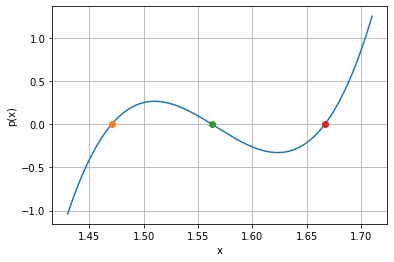

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Answer

xs = np.linspace(1.43,1.71, 1000)
px = []

for i in range(len(xs)):
    px.append(816*xs[i]**3 - 3835*xs[i]**2 + 6000*xs[i] - 3125)
    
plt.plot(xs,px)

for j in range (len(xroots)):
    plt.plot(xroots[j],0,"o")
    
plt.grid()
plt.xlabel("x")
plt.ylabel("p(x)")
plt.show()


(1c) (10 points) Use the function [`scipy.optimize.fsolve`](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.fsolve.html) with starting guesses $x0=1$, $x0=1.6$ and $x0=1.7$ to compute the three roots.

In [19]:
import scipy.optimize as opt

def f(x):
    y = 816.0*x**3 - 3835.0*x**2 + 6000.0*x - 3125.0
    
    return y

x0 = [1.0, 1.6, 1.7]
xroots_1 = []
for i in range(len(x0)):
    xroots_1.append(float(opt.fsolve(f, x0[i])))

print("The three roots are:\n{}".format(xroots_1))

The three roots are:
[1.470588235294112, 1.5625000000001783, 1.6666666666666585]


(1d) (10 bonus points) The secant method is a method for solving nonlinear equations. It
uses two points to draw a secant line and use the intersection of the secant line
with the $x$-axis to determine a third (new) point at each step.

The intersection of the secant line with the $x$-axis is given by
$$x_{k+1} = x_k - \frac{f(x_k)}{s_k} = x_k + \frac{x_k-x_{k-1}}{f(x_{k-1}) / f(x_k) - 1}.$$

Complete the implementation of the secant method below...

In [20]:
def secant(f, a, b, tol=0):
    '''
    Uses secant method to search for a root  of f(x) in the interval [a,b].
    Tol is the convergence threshold on x. If not set a default is provided.
    Returns the root and the number of iterations needed to find it.
    '''
    
    if tol <= 0:
        tol = np.finfo(float).eps

    fa = f(a)
    
    for k in range(100):
        fb = f(b)
        if abs(fb) == 0:
            x = b
            break

        # TODO: compute x based on the formula above
        # x = ...
        
        x = b + (b - a) / (fa / fb - 1)
        
        delta = b - a
        
        if abs(delta) < tol*abs(b):
            break
        
        a, fa = b, fb
        b = x

    return x, k

and then use your implementation of the secant method to find the root by starting start with $a = 1$ and $b = 2$.

In [21]:
# Answer

f_1d = lambda x: 816.0*x**3 - 3835.0*x**2 + 6000.0*x - 3125.0

secant(f_1d, 1, 2)

(1.666666666666653, 11)

## Problem 2 (20 points) Integration

(2a) (5 points) Using the `scipy.integrate.quad` function to compute the integral numerically:
$$I = \int_0^1 \cos(2\pi x) dx.$$

In [22]:
# useful functions
import scipy
import scipy.integrate as integrate
import sympy


In [23]:
# Answer
print(integrate.quad(lambda x: np.cos(2*np.pi*x),0,1))

(4.163336342344337e-17, 7.116990625963435e-15)


(2b) (5 points) Find the analytical integral of (a) using `sympy.integrate` and compare it with the numerical solution.

In [24]:
# Answer
sympy.integrate(sympy.cos(2*sympy.pi*x),(x,0,1))

0

(2c) (10 points) Use the `scipy.integrate.dblquad` function in SciPy to compute the following integral numerically:
$$ I = \int_{y=0}^{1/2}\int_{x=0}^{1-2y} xy dx dy.$$

In [25]:
# useful functions
f_2c = lambda x, y: x*y
f_x = lambda x: 0
f_y = lambda y: 1 - 2*y

In [26]:
# Answer
res = integrate.dblquad(f_2c, 0, 0.5, f_x, f_y)
print(res[0])

0.010416666666666668


## Problem 3 (20 points + 5 bonus points) Minimization

Consider the function $p(x) = 9 x^2 - 6 x + 2$.

(3a) (5 points) Compute a critical value of of $p(x)$ by solving $p^\prime (x) = 0$ using SymPy.


In [27]:
import sympy
# useful function: sympy.diff
x = sympy.symbols('x')
f_3a = 9*x**2 - 6*x + 2

In [28]:
# Answer:
diff_exp = sympy.diff(f_3a, x)
c_val = sympy.roots(diff_exp)
c_val = [sympy.N(i) for i in c_val]
print(c_val)

[0.333333333333333]


(3b) (5 points) Use `scipy.optimize.minimize_scalar` function to compute the minimum of $p(x)$.

In [29]:
from scipy.optimize import minimize_scalar
# Answer:
def f_3b(x):
    return 9*x**2 - 6*x + 2

min = minimize_scalar(f_3b).x
print(min)

0.3333333333333333


(3c) (5 points) Use the `scipy.optimize.minimize` function to compute the minimum of
the [Rosenbrock function](https://en.wikipedia.org/wiki/Rosenbrock_function)

$$ f(x,y) = 100(y-x^2)^2 + (1-x)^2, $$

starting from $(x,y) = (0, 0)$. Note that the global minimum is found at $x^*=(1, 1).$ 
Use the BFGS method to solve it.

In [75]:
from scipy.optimize import minimize
# Answer:

def rosen(X):
    x, y = X
    return 100 * (y - x ** 2) ** 2 + (1 - x) ** 2

X0 = [0,0]

print(minimize(rosen, X0, method= 'BFGS'))

      fun: 2.8439853482662883e-11
 hess_inv: array([[0.49482461, 0.98957647],
       [0.98957647, 1.98394241]])
      jac: array([ 3.98676209e-06, -2.84413471e-06])
  message: 'Optimization terminated successfully.'
     nfev: 72
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([0.99999467, 0.99998932])


(3d) (10 points) Repeat the problem in (c) but solve it using the Newton-CG method.
Note that you need to provide the Jacobian (the gradient vector), which you can
compute using `sympy` or compute by hand.

Some useful functions include `sympy.diff`, `sympy.lambdify`, and `scipy.optimize.minimize`.

In [ ]:
# Answer





(3e) (10 bonus points) The $N$-dimensional Rosenbrock function is given by

$$ f(x) = \sum_{i=1}^{N-1} \left(100(x_{i+1}-x_{i}^2)^2 + (1-x_i)^2 \right), $$

where $x=(x_1, x_2, \dots, x_N) \in \mathbb{R}^N$.

Adapt the code above in Part (d) to N=10 starting from the initial guess $(0, 0, \dots, 0)$.

In [ ]:
# Answer


# Problem 4. (20 points + 5 bonus points) Object-Oriented Programming (OOP)

(4a) (10 points) Define a `BankAccount` class with `owners`, `number`,
and `balance` instant attributes as well as `deposit` and `withdraw` methods.
The attributes should be defined in the `__init__` method. The `deposit`
and `withdraw` should take `amount` as input argument and should update
the `balance` attribute.

Also write a `__str__` method for printing. Document the class and methods
with docstrings.

In [64]:
# Answer
class BankAccount:
    def __init__(self, owners, number, balance):
        self.owners = owners
        self.number = number
        self.balance = balance
    
    def deposit(self, amount):
        self.balance += amount
        print("Success!")
    
    def withdraw(self, amount):
        temp = self.balance - amount
        if temp >= 0:
            self.balance = temp
            print("Success!")
        else:
            print("Insufficient Fund!")
        
    def __str__(self):
        return 'Owner(s): {self.owners}\nAccount Number: {self.number}\nBalance: {self.balance}'.format(self = self)

Test your implementation by creating an instance and testing its methods.
You can use a list of character strings (names) for `owners`.

In [65]:
# Answer

customer_1 = BankAccount(['Lisa', 'John'], '025685354', 2000)
customer_2 = BankAccount('Lucy', '036124852', 1000)
customer_3 = BankAccount('Lynn', '456325122', 500)

In [66]:
# print inital
print(customer_1)
print(customer_2)
print(customer_3)

Owner(s): ['Lisa', 'John']
Account Number: 025685354
Balance: 2000
Owner(s): Lucy
Account Number: 036124852
Balance: 1000
Owner(s): Lynn
Account Number: 456325122
Balance: 500


In [67]:
# withdraw
customer_1.withdraw(500)
customer_2.withdraw(300)
customer_3.withdraw(1000)

Success!
Success!
Insufficient Fund!


In [50]:
# after withdraw
print(customer_1)
print(customer_2)
print(customer_3)

Owner(s): ['Lisa', 'John']
Account Number: 025685354
Balance: 2500
Owner(s): Lucy
Account Number: 036124852
Balance: 3700
Owner(s): Lynn
Account Number: 456325122
Balance: 2500


In [53]:
# deposit
customer_1.deposit(1000)
customer_2.deposit(3000)
customer_3.deposit(2000)

Success!
Success!
Success!


In [54]:
# after deposit
print(customer_1)
print(customer_2)
print(customer_3)

Owner(s): ['Lisa', 'John']
Account Number: 025685354
Balance: 3000
Owner(s): Lucy
Account Number: 036124852
Balance: 4000
Owner(s): Lynn
Account Number: 456325122
Balance: 2500


(4b) (10 points) Create a subclass `InterestAccount`, which
inherits all of the variables and methods of the `BankAccount`
class. Add `interest_rate` and `minimum_balance` as a new
attribute and a new method `compute_interest` (for simplicity,
just multiply the balance with the `interest_rate`). Make
sure you call the `__init__`
function of the superclass `BankAccount`. Also, overwrite the
`withdraw` method to reject the withdrawal if the balance would
fall below `minimum_balance`.

Document the class and methods with docstrings.

In [59]:
# Answer
class InterestAccount(BankAccount):
    def __init__(self, interest_rate, minimum_balance):
        self.interest_rate = interest_rate
        self.minimum_balance = minimum_balance
        super().__init__()
        
    def compute_interest(self):
        self.balance = self.balance * self.interest_rate
    
    def withdraw(self, amount):
        temp = self.balance - amount
        if temp < self.minimum_balance:
            print("Withdraw Rejected!")
        else:
            self.balance = temp
            print("Success!")  
        super().withdraw()

(4c) (10 points) Create a class `Customer` with attributes
`name`, `birthday`, `gender`, `id_number`, and `accounts`.

Write a method `create_account`, which creates an
`InterestAccount` with the customer as the owner, append the
created account to the `accounts` attribute of the `Customer`
object. Test your implementation by creating multiple accounts
for a customer.

In [ ]:
# Answer
class Customer():
    def __init__(self, name, birthday, gender, id_number, accounts):
        self.name = name
        self.birthday = birthday
        self.gender = gender
        self.id_number = id_number
        self.accounts = []
    
    def create_account(self, customer):
        self.accounts.append(customer)

(4d) (10 bonus points)
In this problem, we practice many-to-many relationships: rewrite the
`Customer` class to add a new method
`link_account`, which should append a customer as
another owner to a `InterestAccount` and add the account
to the customer's list of accounts.

In [ ]:
# Answer


Rewrite `InterestAccount` by adding a new method `close_account` in
`InterestAccount`, which should remove the account from its owners.


In [ ]:
# Answer


Write code to test your implementation by creating
multiple customers and multiple accounts with joint
owners, and deleting some of the accounts.

In [ ]:
# Answer



# Problem 5. (20 points) Pandas & Statistical Modeling

First, we will need to import the following libraries:

In [68]:
import pandas as pd
import numpy as np

import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

import matplotlib.pyplot as plt
%matplotlib inline

1) Create a pandas Series object with values given by the first 10 positive even integers (2, 4, ..., 20) and with indices given by the first 10 letters of English alphabet. Display the result.

In [ ]:
s_5_1 = pd.Series(range(2, 21, 2), index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']) 
print(s_5_1)

a     2
b     4
c     6
d     8
e    10
f    12
g    14
h    16
i    18
j    20
dtype: int64


2) Download the file BoxOffice2018.csv to your current directory and use read_csv function in Pandas to read this csv file and create a DataFrame named "df_box". This data is the top 30 highest earning movies in 2018. The data is from www.boxofficemojo.com.

In [ ]:
import pandas as pd

df_box = pd.read_csv('BoxOffice2018.csv')
df_box.head()

,Rank,Movie_Title,Studio,Total Gross / Theaters,Unnamed: 4,Opening / Theaters,Unnamed: 6,Open,Close
0,1,Black Panther,BV,"$700,059,566","4,084","$202,003,951","4,020",43512,9-Aug
1,2,Avengers: Infinity War,BV,"$678,815,482","4,474","$257,698,183","4,474",43582,13-Sep
2,3,Incredibles 2,BV,"$608,581,744","4,410","$182,687,905","4,410",43631,13-Dec
3,4,Jurassic World: Fallen Kingdom,Uni.,"$417,719,760","4,485","$148,024,610","4,475",43638,4-Oct
4,5,Aquaman,WB,"$334,826,690","4,184","$67,873,522","4,125",43820,-


3) Let's rename some columns so that we can access them as attributes in Python.

Rename the column "Total Gross / Theaters" to "Total_Gross"
Raname the column "Unnamed: 4" (it's the column to the right of ""Total Gross / Theaters") to "Theaters_Total"
Raname the column "Opening / Theaters" to "Opening"
Raname the column "Unnamed: 6" to "Theaters_Opening"
Display the first 5 rows to show the result.

In [ ]:
df_box.rename(columns= {'Total Gross / Theaters': 'Total_Gross', 'Unnamed: 4': 'Theaters_Total', 'Opening / Theaters': 'Opening', 'Unnamed: 6': 'Theaters_Opening'}, inplace= True)
df_box.head()

,Rank,Movie_Title,Studio,Total_Gross,Theaters_Total,Opening,Theaters_Opening,Open,Close
0,1,Black Panther,BV,"$700,059,566","4,084","$202,003,951","4,020",43512,9-Aug
1,2,Avengers: Infinity War,BV,"$678,815,482","4,474","$257,698,183","4,474",43582,13-Sep
2,3,Incredibles 2,BV,"$608,581,744","4,410","$182,687,905","4,410",43631,13-Dec
3,4,Jurassic World: Fallen Kingdom,Uni.,"$417,719,760","4,485","$148,024,610","4,475",43638,4-Oct
4,5,Aquaman,WB,"$334,826,690","4,184","$67,873,522","4,125",43820,-


4) Delete the columns "Open" and "Close" so that we have a cleaner data.

In [ ]:
df_box = df_box.drop(columns= ['Open', 'Close'])
df_box.head()

,Rank,Movie_Title,Studio,Total_Gross,Theaters_Total,Opening,Theaters_Opening
0,1,Black Panther,BV,"$700,059,566","4,084","$202,003,951","4,020"
1,2,Avengers: Infinity War,BV,"$678,815,482","4,474","$257,698,183","4,474"
2,3,Incredibles 2,BV,"$608,581,744","4,410","$182,687,905","4,410"
3,4,Jurassic World: Fallen Kingdom,Uni.,"$417,719,760","4,485","$148,024,610","4,475"
4,5,Aquaman,WB,"$334,826,690","4,184","$67,873,522","4,125"


5) The columns that contain "numbers" are not of numerical type. We will convert them to integers.

In the "Total_Gross" and "Opening", remove the "$" and "," and casts the results to integers. Replace the original columns with the transformed columns.
In the "Theaters_Total" and "Theaters_Opening", remove the "," and casts the results to integers
Display the result with df_box.head()
Check the types of columns by using df_box.info() . (now you should those columns are now of int64(integer) type)

In [ ]:
df_box['Total_Gross'] = df_box['Total_Gross'].str.replace('$','')
df_box['Total_Gross'] = df_box['Total_Gross'].str.replace(',','')
df_box['Opening'] = df_box['Opening'].str.replace('$','')
df_box['Opening'] = df_box['Opening'].str.replace(',','')
df_box.head()

C:\Users\alexb\AppData\Local\Temp\ipykernel_27192\1024096762.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_box['Total_Gross'] = df_box['Total_Gross'].str.replace('$','')
C:\Users\alexb\AppData\Local\Temp\ipykernel_27192\1024096762.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_box['Opening'] = df_box['Opening'].str.replace('$','')


,Rank,Movie_Title,Studio,Total_Gross,Theaters_Total,Opening,Theaters_Opening
0,1,Black Panther,BV,700059566,"4,084",202003951,"4,020"
1,2,Avengers: Infinity War,BV,678815482,"4,474",257698183,"4,474"
2,3,Incredibles 2,BV,608581744,"4,410",182687905,"4,410"
3,4,Jurassic World: Fallen Kingdom,Uni.,417719760,"4,485",148024610,"4,475"
4,5,Aquaman,WB,334826690,"4,184",67873522,"4,125"


6) Now we are ready to compute some statistics (of these top 30 movies). Write a code to answer the following questions:

What is the standard deviation of the total gross?
What is the mininum of "Theaters_Total"?
What is the maximum of "Theaters_Opening"?
What is the 80 percentile (0.8 quantile) of "Opening"?

In [ ]:
df_box['Total_Gross'] = pd.to_numeric(df_box['Total_Gross'])
df_box['Theaters_Opening'] = df_box['Theaters_Opening'].str.replace(',','')
df_box['Theaters_Opening'] = pd.to_numeric(df_box['Theaters_Opening'])
df_box['Opening'] = pd.to_numeric(df_box['Opening'])

In [ ]:
print("The standand deviation of the total gross: {}".format(df_box['Total_Gross'].std()))
print("The maximum of Theaters_Opening: {}".format(df_box['Theaters_Opening'].max()))
print("The 80 percentile (0.8 quantile) of Opening: {}".format(df_box['Opening'].quantile(0.8)))      

The standand deviation of the total gross: 160388617.4210023
The maximum of Theaters_Opening: 4475
The 80 percentile (0.8 quantile) of Opening: 81088702.60000001


7) Write a code to find how many movies (in the top30) each studio made. (e.g. BV (Buenva Vista) produced 7 movies that were in the top30), ...). Display your answer.

In [ ]:
studio_made = df_box['Studio'].value_counts()

for i in range(len(studio_made)):
    studio = studio_made.index[i]
    movie = studio_made[studio]
    print("{} produced {} movies that were in the top 30.".format(studio, movie))

WB produced 8 movies that were in the top 30.
BV produced 7 movies that were in the top 30.
Uni. produced 4 movies that were in the top 30.
Sony produced 4 movies that were in the top 30.
Par. produced 3 movies that were in the top 30.
Fox produced 2 movies that were in the top 30.
WB (NL) produced 1 movies that were in the top 30.
MGM produced 1 movies that were in the top 30.


8) How much money (from Total_Gross) did each studio earn from all of their movies in the top30? (Note: to make it easy, you don't need to combine "WB" and "WB(NL)"). Display your result.

In [ ]:
studio_list = df_box['Studio'].unique()

for i in range(len(studio_list)):
    sum = df_box[df_box['Studio'] == studio_list[i]]['Total_Gross'].sum()
    print("{} earned ${} from all of their movies in the top 30.".format(studio_list[i], sum))

BV earned $2790704750 from all of their movies in the top 30.
Uni. earned $968317660 from all of their movies in the top 30.
WB earned $1411324635 from all of their movies in the top 30.
Fox earned $534474626 from all of their movies in the top 30.
Par. earned $535379054 from all of their movies in the top 30.
Sony earned $686215417 from all of their movies in the top 30.
WB (NL) earned $117450119 from all of their movies in the top 30.
MGM earned $115715889 from all of their movies in the top 30.


9) Sort the "Opening" column in descending order (i.e., highest opening first) and display the data of the top 5 "Opening". What movie has the third-highest opening? Answer this in the markdown cell below.

In [ ]:
df_box_sorted = df_box.sort_values(by = ['Opening'], ascending= False)
df_box_sorted.head()

,Rank,Movie_Title,Studio,Total_Gross,Theaters_Total,Opening,Theaters_Opening
1,2,Avengers: Infinity War,BV,678815482,"4,474",257698183,4474
0,1,Black Panther,BV,700059566,"4,084",202003951,4020
2,3,Incredibles 2,BV,608581744,"4,410",182687905,4410
3,4,Jurassic World: Fallen Kingdom,Uni.,417719760,"4,485",148024610,4475
5,6,Deadpool 2,Fox,318491426,"4,349",125507153,4349


In [ ]:
# Third-highest opening movie
df_box_sorted['Movie_Title'].loc[2]

'Incredibles 2'

Answer:

The "Incredibles 2" has third-highest opening

# Problem 6. (15 bonus points) Linear Regression

Download the file `data_linear_regression.csv` and create a DataFrame from this data

In [31]:
import pandas as pd

df = pd.read_csv('data_linear_regression.csv')
df.head()

,x1,x2,x3,y
0,0.148227,0.446577,-1.009014,4.138490
1,0.353487,-0.648183,0.796402,2.980097
2,-1.087250,-0.622992,-0.667353,3.507599
3,0.247096,1.072407,1.910038,17.975063
4,-0.156840,-0.557375,1.317638,2.496506


Using the method head or info you will see that there are 4 columns. x1, x2, x3 are input(independent) variables and y is the response(dependent) variable. We will perform ordinary linear regression on this data based on two guesses.

**1st model:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$
Perform ordinary linear regression (use `ols` in `statsmodels.formula.api` (we imported this as `smf`)) to find the coefficients 
- Print out the test statistics using the `summary` method.

In [32]:
import statsmodels.formula.api as smf

model1 = smf.ols('y ~ x1 + x2 + x3', data= df)
fit1 = model1.fit()
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8.766
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           0.000105
Time:                        20:17:15   Log-Likelihood:                -170.25
No. Observations:                  50   AIC:                             348.5
Df Residuals:                      46   BIC:                             356.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9764      1.081      3.680      0.0

Answer the following questions:
-  What are the cofficients $\beta_0, \beta_1, \beta_2, \beta_3 $ (in our model: $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3$)?
-  By looking at just the $t$-statistics, which coefficient is most likely to be non-zero?
-  What is the R-squared of our first model? Do you think this model fits the data very well?  Why?

Conclusion:

The cofficients: beta0 = 3.9764, beta1 = -0.0676, beta2 = 6.0327, beta3 = 2.7438.

Beta2 is most likely to be non-zero since it has a largest t-statistic, which means its standard error is small in comparision to its coefficient.

R-squared of our first model is 0.364, which means the regression model does not fit the observation very well.
_________________________________________________________________________________________________________________________________________________________

Let's try to include all interaction terms of the input variables $x_1, x_2, x_3$.
What are all the possible interaction terms? (Hint: all the $x_i x_j$). Add your answers to the equations in the cell below with a coefficient $\beta_i$ in front.

**2st model:** $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 $ + ...(add your interaction terms here)...

- Perform ordinary linear regression (use `ols` in `statsmodels.formula.api` (we imported this as `smf`)) to find the coefficients 
- Print out the test statistics using the `summary` method.

In [33]:
model2= smf.ols('y ~ x1 + x2 + x3 + x1*x2 + x1*x3 + x2*x3', data= df)
fit2 = model2.fit()
print(fit2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2590.
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           2.50e-53
Time:                        20:17:19   Log-Likelihood:                -34.241
No. Observations:                  50   AIC:                             82.48
Df Residuals:                      43   BIC:                             95.87
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.9590      0.075     53.017      0.0

Answer the following questions:
-  What are the cofficients $\beta_0, \beta_1, ..., \beta_6 $ in this model?
-  Which interaction term has the coefficient that is largest in magnitude(meaning it has the most significant predictive power)?
-  What is the R-squared of our second model? Do you think this model fits the data very well?  Why?

Conclusion:

The cofficients: beta0 = 3.9590, beta1 = 3.1222, beta2 = 4.9514, beta3 = 2.0158, beta4 = 3.9754, beta5 = 6.0570, beta6 = -0.0775.

x1:x3 has the coefficient that is largest in magnitude.

R-squared of our second model is 0.997, which means the regression model fits the observation very well.
_________________________________________________________________________________________________________________________________________________________